In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)

n_students = 1000
n_records = 100000
start_date = datetime(2023, 1, 1)

data = []

for _ in range(n_records):
    user_id = f"user_{np.random.randint(1, n_students + 1)}"
    timestamp = start_date + timedelta(minutes=np.random.randint(0, 100000))
    problem_id = f"prob_{np.random.randint(1, 300)}"
    
    # Study time in minutes, correlated with student ability (simulate)
    base_ability = np.random.normal(70, 15)  # base ability score 0-100
    time_spent = max(5, np.random.normal(30, 10))  # time spent on problem
    
    # Difficulty of the problem (1 easy - 5 hard)
    difficulty = np.random.choice([1, 2, 3, 4, 5], p=[0.2, 0.3, 0.3, 0.15, 0.05])
    
    # Previous score of the student (simulate consistency)
    prev_score = np.clip(base_ability + np.random.normal(0, 10), 0, 100)
    
    # Probability of correct answer depends on ability, time spent, and difficulty
    prob_correct = (
        0.6 * (base_ability / 100) + 
        0.3 * (time_spent / 60) - 
        0.2 * (difficulty / 5)
    )
    prob_correct = np.clip(prob_correct, 0, 1)
    
    correct = np.random.choice([0,1], p=[1 - prob_correct, prob_correct])
    
    # Tag (topic)
    tag = np.random.choice(['Algebra', 'Geometry', 'Calculus', 'Statistics', 'Arithmetic'])
    
    # Bundle ID
    bundle_id = f"bundle_{np.random.randint(1, 30)}"
    
    # Final score affected by all above
    final_score = (
        0.5 * base_ability + 
        0.2 * prev_score + 
        0.2 * (time_spent / 60) * 100 - 
        0.1 * difficulty * 10 + 
        np.random.normal(0, 5)
    )
    final_score = np.clip(final_score, 0, 100)
    
    data.append([user_id, timestamp, problem_id, time_spent, difficulty, prev_score, correct, tag, bundle_id, final_score])

columns = ['user_id', 'timestamp', 'problem_id', 'time_spent', 'difficulty', 'prev_score', 'correct', 'tag', 'bundle_id', 'final_score']
df = pd.DataFrame(data, columns=columns)

# Create a score range target (Fail <50, Pass 50-75, Excellent >75)
def score_range(score):
    if score < 50:
        return 'Fail'
    elif score < 75:
        return 'Pass'
    else:
        return 'Excellent'

df['score_range'] = df['final_score'].apply(score_range)

print(df.head())


    user_id           timestamp problem_id  time_spent  difficulty  \
0  user_103 2023-01-11 23:15:00   prob_271   45.230299           1   
1  user_344 2023-02-13 17:15:00   prob_294   45.387150           1   
2  user_976 2023-02-11 01:50:00   prob_190   22.320235           2   
3  user_167 2023-03-02 15:13:00    prob_89   27.083063           3   
4   user_81 2023-03-05 22:27:00    prob_50   40.919923           3   

   prev_score  correct         tag  bundle_id  final_score score_range  
0   82.505741        1  Arithmetic   bundle_2    75.488155   Excellent  
1   92.157890        1  Statistics  bundle_28    76.389499   Excellent  
2   73.086632        1  Arithmetic   bundle_9    58.500753        Pass  
3   50.774898        0    Calculus  bundle_14    45.869100        Fail  
4   37.741353        1    Geometry  bundle_12    44.684158        Fail  


In [2]:
df.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\raw\student_performance_data.csv', index=False)

In [6]:
df.shape

(100000, 11)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      100000 non-null  object        
 1   timestamp    100000 non-null  datetime64[ns]
 2   problem_id   100000 non-null  object        
 3   time_spent   100000 non-null  float64       
 4   difficulty   100000 non-null  int32         
 5   prev_score   100000 non-null  float64       
 6   correct      100000 non-null  int32         
 7   tag          100000 non-null  object        
 8   bundle_id    100000 non-null  object        
 9   final_score  100000 non-null  float64       
 10  score_range  100000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 7.6+ MB


In [4]:
df.describe()

,timestamp,time_spent,difficulty,prev_score,correct,final_score
count,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2023-02-04 20:30:41.332200192,29.947280,2.542170,69.640137,0.469120,56.387143
min,2023-01-01 00:01:00,5.000000,1.000000,0.000000,0.000000,4.350713
25%,2023-01-18 12:22:30,23.181750,2.000000,57.884964,0.000000,48.143212
50%,2023-02-05 00:21:00,29.934190,2.000000,69.999583,0.000000,56.500977
75%,2023-02-22 03:00:00,36.719253,3.000000,82.107540,1.000000,64.731477
max,2023-03-11 10:38:00,70.657733,5.000000,100.000000,1.000000,100.000000
std,NaN,9.933878,1.114887,17.291051,0.499048,12.164154


In [5]:
df.nunique()

user_id         1000
timestamp      63059
problem_id       299
time_spent     99374
difficulty         5
prev_score     95121
correct            2
tag                5
bundle_id         29
final_score    99995
score_range        3
dtype: int64

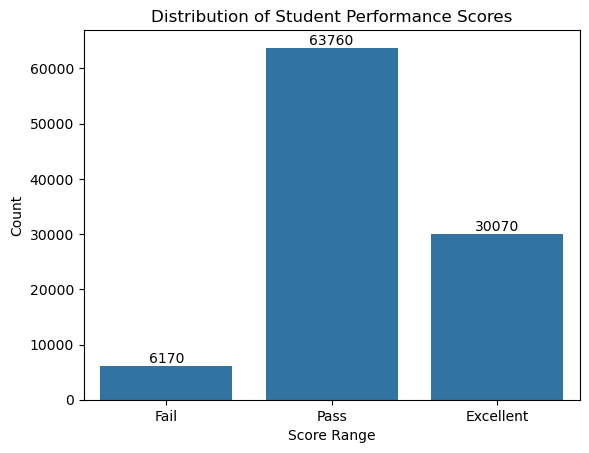

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x='score_range', data=df)
plt.title('Distribution of Student Performance Scores')
plt.xlabel('Score Range')
plt.ylabel('Count')
ax.bar_label(ax.containers[0])
plt.xticks([0, 1, 2], ['Fail', 'Pass', 'Excellent'])
plt.show()

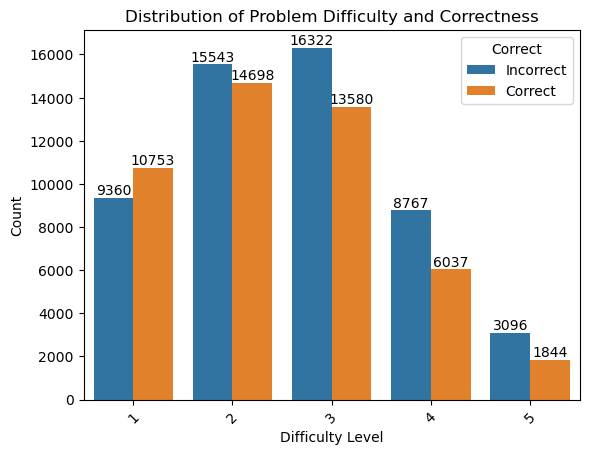

In [8]:
ax = sns.countplot(x='difficulty', data=df, hue = 'correct')
plt.title('Distribution of Problem Difficulty and Correctness')
plt.legend(title='Correct', loc='upper right', labels=['Incorrect', 'Correct'])   
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

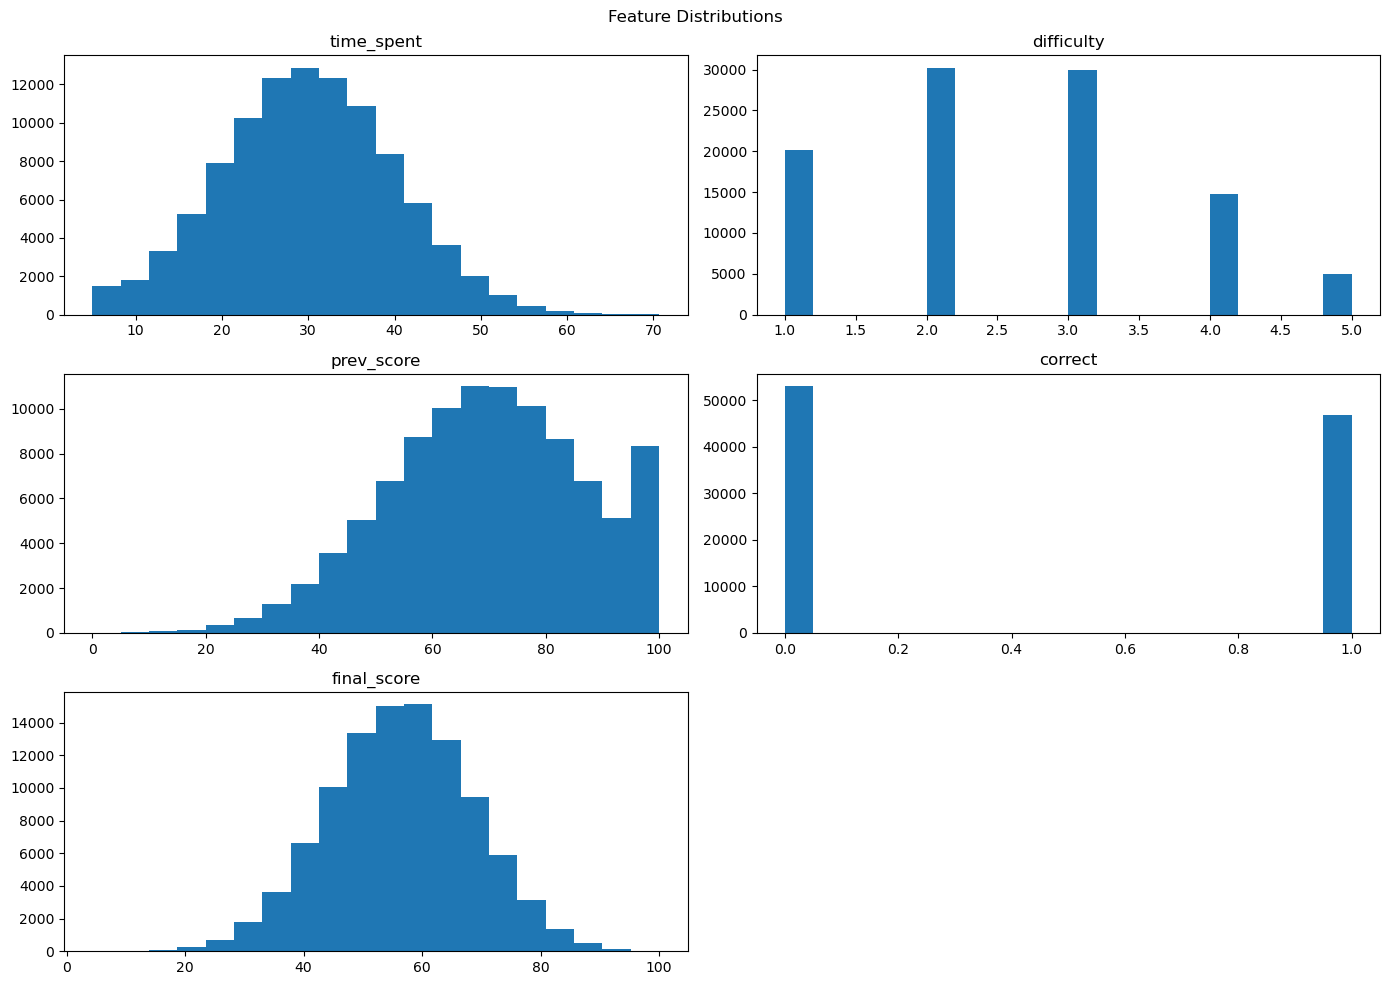

In [9]:
# Histogram for each numeric column
data = df.drop(columns = ['user_id','timestamp','problem_id','tag','bundle_id','score_range']) # only numerical columns
data.hist(bins=20, figsize=(14, 10), grid=False)
plt.suptitle("Feature Distributions")
plt.tight_layout()
plt.show()

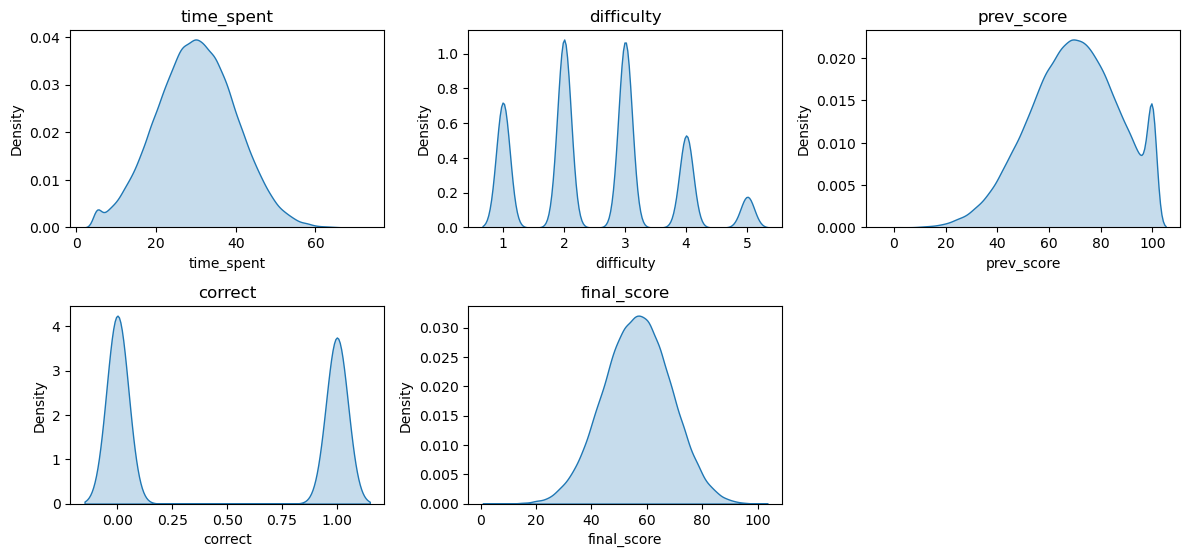

In [10]:
import warnings
warnings.filterwarnings("ignore")
# KDE plots for key features
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(data[column], shade=True)
    plt.title(column)
plt.tight_layout()
plt.show()

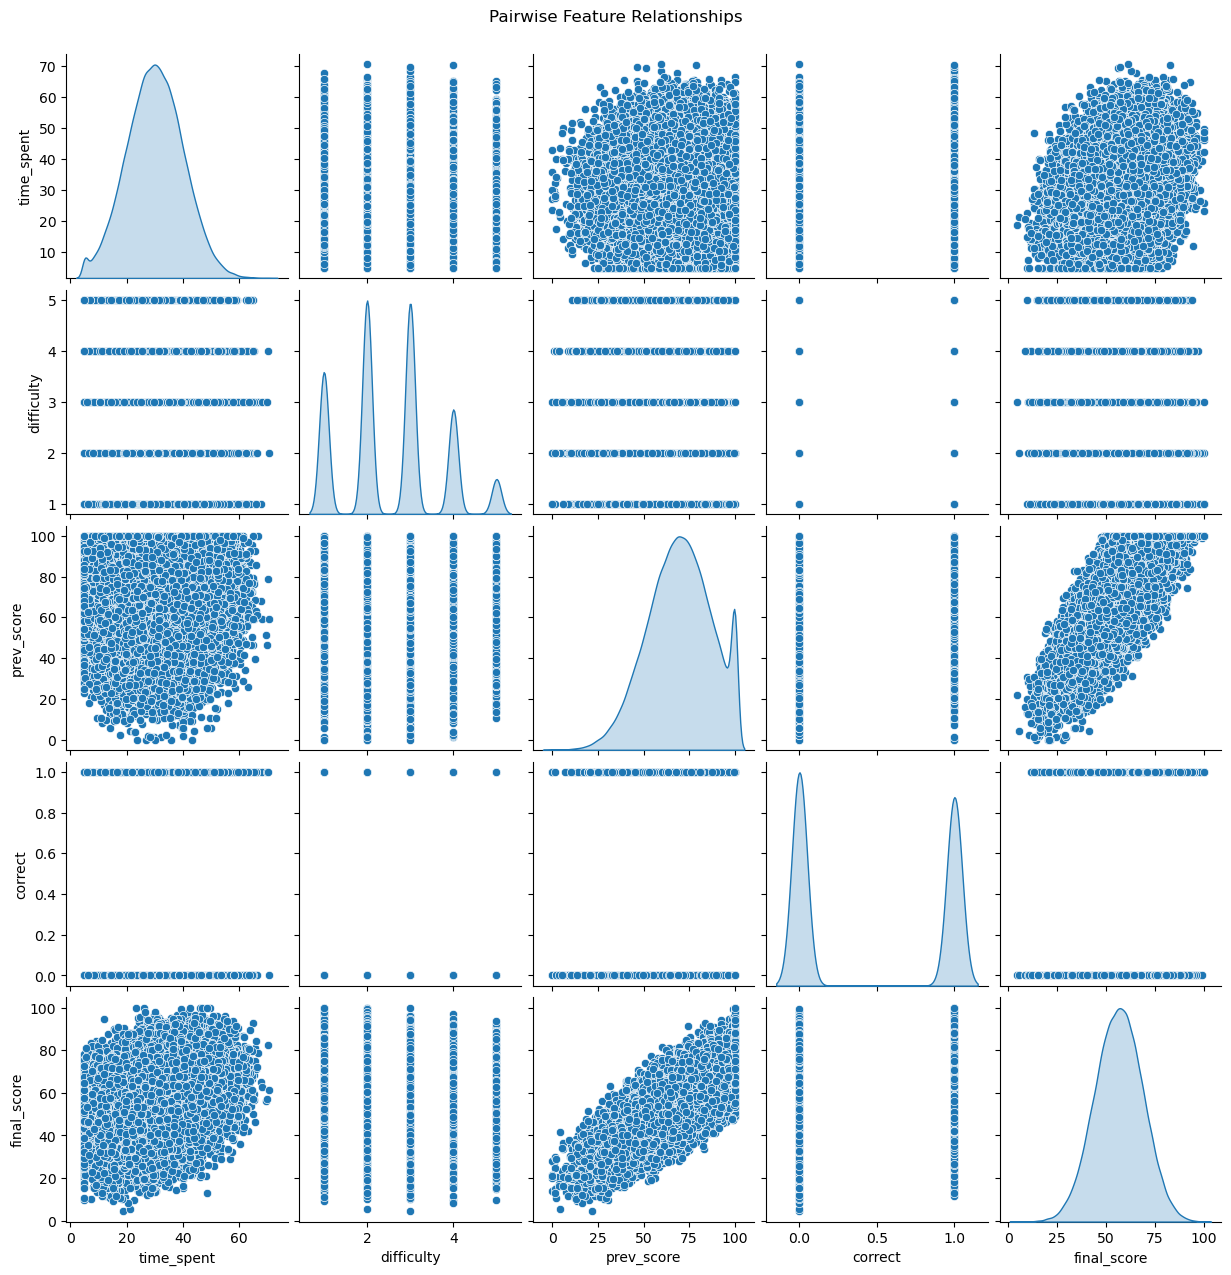

In [11]:
sns.pairplot(data, diag_kind='kde')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()

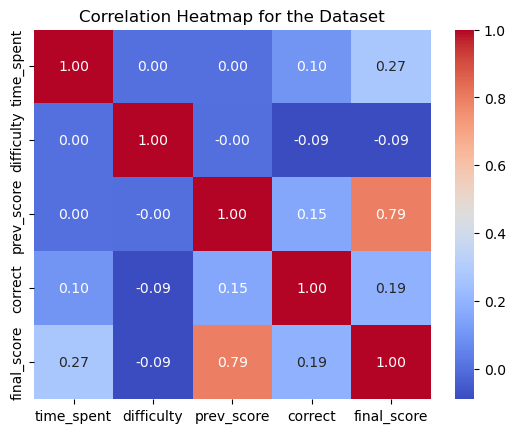

In [12]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for the Dataset')
plt.show()

<Axes: >

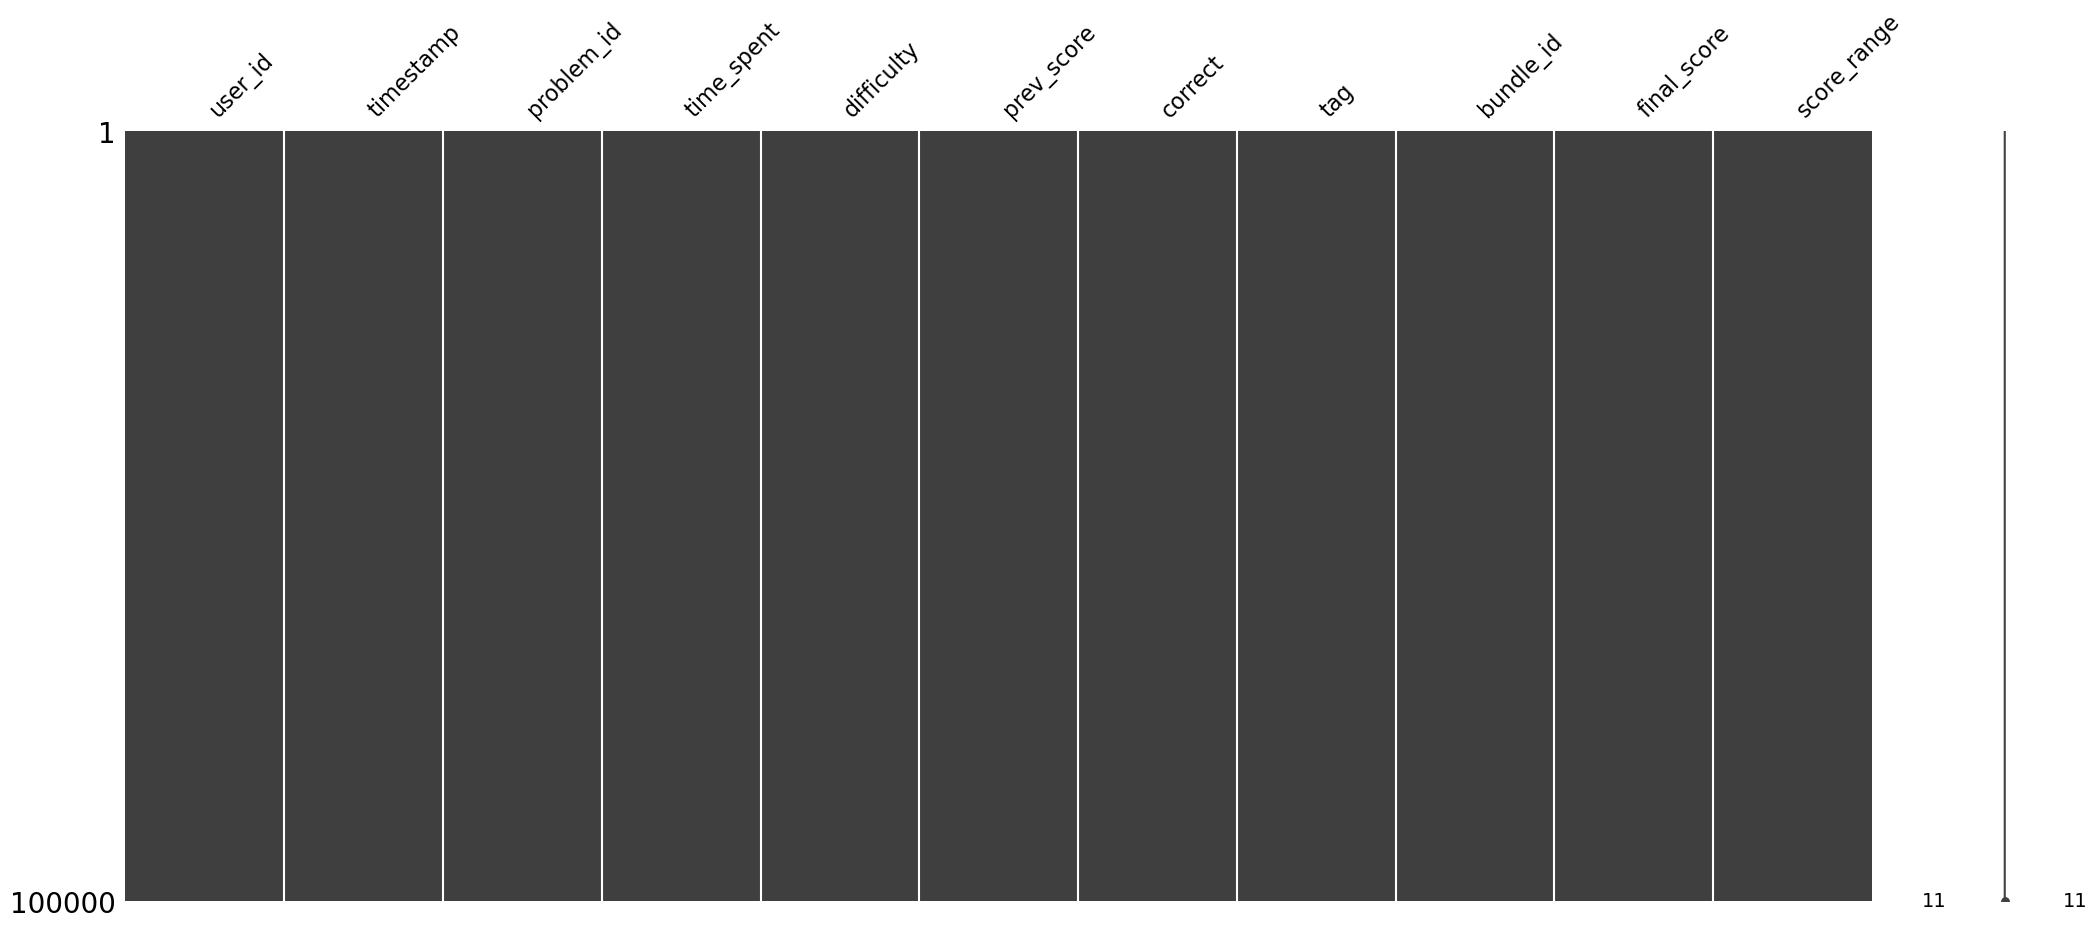

In [14]:
import missingno as msno
msno.matrix(df)

In [15]:
df.isnull().sum()

user_id        0
timestamp      0
problem_id     0
time_spent     0
difficulty     0
prev_score     0
correct        0
tag            0
bundle_id      0
final_score    0
score_range    0
dtype: int64

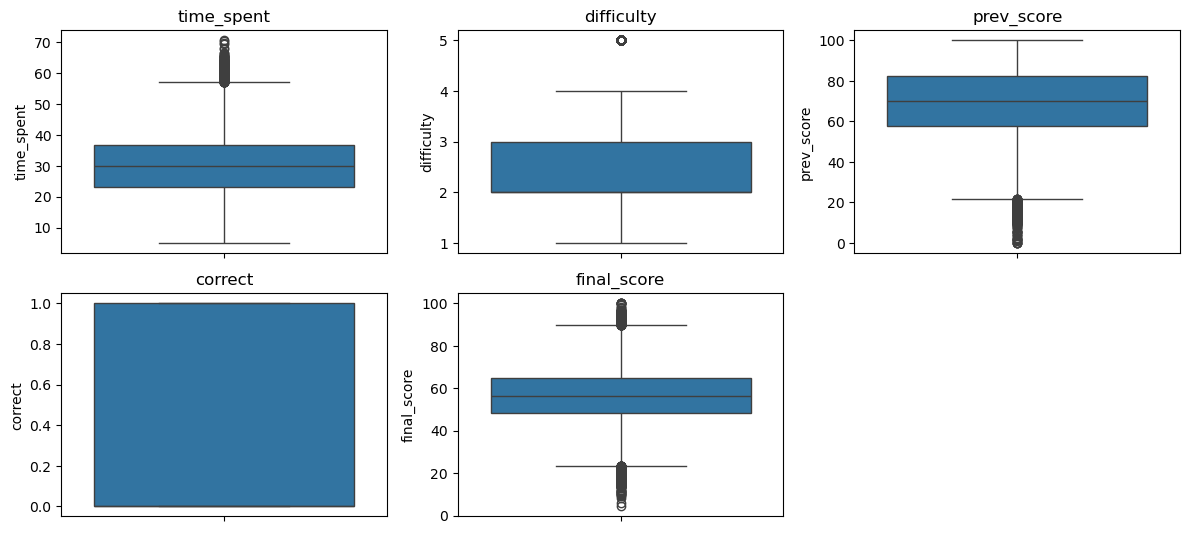

In [16]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [17]:
from scipy.stats.mstats import winsorize
df['time_spent']=winsorize(df['time_spent'], limits=[0.05,0.05])
df['prev_score']=winsorize(df['prev_score'], limits=[0.05,0.05])
df['final_score']= winsorize(df['final_score'], limits=[0.05,0.05])

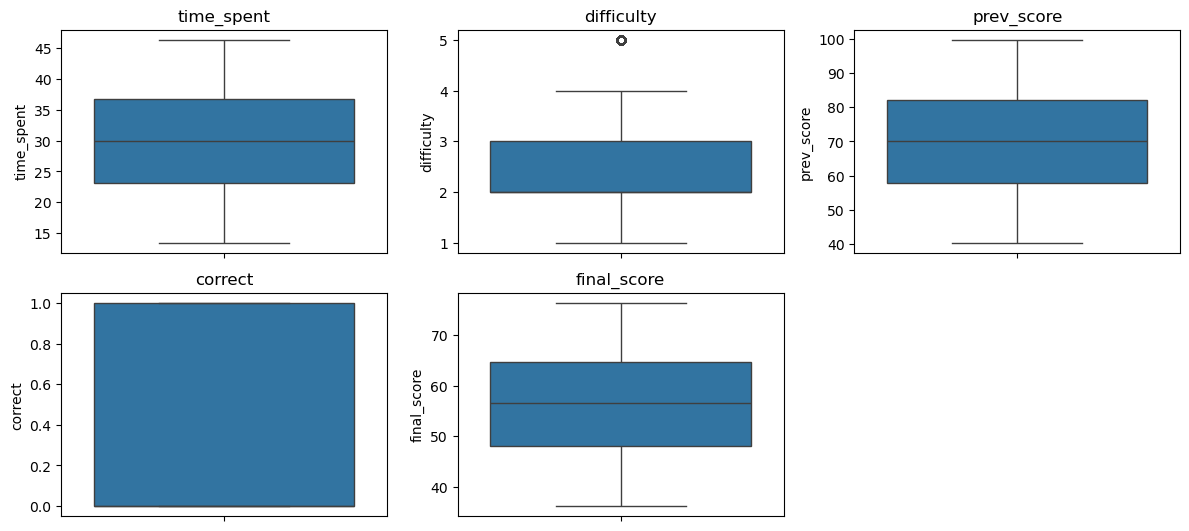

In [18]:
data = df.drop(columns=['user_id','timestamp','problem_id','tag','bundle_id','score_range']) # data updated here
# Boxplots for outlier detection
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      100000 non-null  object        
 1   timestamp    100000 non-null  datetime64[ns]
 2   problem_id   100000 non-null  object        
 3   time_spent   100000 non-null  float64       
 4   difficulty   100000 non-null  int32         
 5   prev_score   100000 non-null  float64       
 6   correct      100000 non-null  int32         
 7   tag          100000 non-null  object        
 8   bundle_id    100000 non-null  object        
 9   final_score  100000 non-null  float64       
 10  score_range  100000 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(2), object(5)
memory usage: 7.6+ MB


In [20]:
import os
import sys
sys.path.append(os.path.abspath(r'D:\Guvi_Project\Personalized Learning Assistant\src'))
from sklearn.preprocessing import LabelEncoder
from Model_Training import pickle_dump
le = LabelEncoder()

df['tag'] = le.fit_transform(df['tag'].astype(str))
pickle_dump(le, name='LabelEncoder-sec2')

LabelEncoder-sec2 Model saved successfully.


In [21]:
df.to_csv(r'D:\Guvi_Project\Personalized Learning Assistant\data\processed\student_performance_data_processed.csv', index=False)

In [22]:
X = df[['time_spent','difficulty','prev_score', 'correct', 'tag']]
y = df['final_score']

In [23]:
from feature_engineering import normalisation
X = normalisation(X, name='StandardScaler-sec2')

StandardScaler-sec2 Model saved successfully.


In [24]:
from sklearn.linear_model import LinearRegression
from Model_Training import regression
regression(LinearRegression(), X, y,name='LinearRegression-sec2')

LinearRegression-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,LinearRegression,4.868833,37.039708,0.701788


In [25]:
from sklearn.ensemble import RandomForestRegressor
regression(RandomForestRegressor(n_estimators=100, random_state=42), X, y, name='RandomForestRegressor-sec2')

RandomForestRegressor-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,RandomForestRegressor,5.108018,41.163713,0.668586


In [26]:
from sklearn.linear_model import Ridge
regression(Ridge(alpha=1.0), X, y, name='Ridge-sec2')

Ridge-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,Ridge,4.868839,37.039712,0.701788


In [27]:
from sklearn.linear_model import Lasso
regression(Lasso(alpha=0.1), X, y, name ='Lasso-sec2')

Lasso-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,Lasso,4.877612,37.070076,0.701544


In [28]:
from sklearn.linear_model import ElasticNet
regression(ElasticNet(alpha=0.1, l1_ratio=0.5), X, y,name ='ElasticNet-sec2')

ElasticNet-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,ElasticNet,4.914958,37.310485,0.699608


In [29]:
from sklearn.tree import DecisionTreeRegressor
regression(DecisionTreeRegressor(random_state=42), X, y, name ='DecisionTreeRegressor-sec2')

DecisionTreeRegressor-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,DecisionTreeRegressor,6.809478,75.283716,0.393881


In [ ]:
from sklearn.svm import SVR
regression(SVR(kernel='linear'), X, y, name = 'SVR-sec2')

SVR=sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,SVR,4.860828,37.147116,0.700924


In [31]:
from sklearn.ensemble import GradientBoostingRegressor
regression(GradientBoostingRegressor(n_estimators=100, random_state=42), X, y, name='GradientBoostingRegressor-sec2')

GradientBoostingRegressor-sec2 Model saved successfully.


,Model,Mean Absolute Error,Mean Squared Error,R2 Score
0,GradientBoostingRegressor,4.83472,36.599497,0.705333
